In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
   r'C:\Users\varsh\Desktop\archive\New_Plant_Diseases_Dataset_Augmented\New Plant Diseases Dataset(Augmented)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 66551 files belonging to 36 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\varsh\Desktop\archive\New_Plant_Diseases_Dataset_Augmented\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 16636 files belonging to 36 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 36), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[167.   166.   162.  ]
   [166.5  165.5  161.5 ]
   [172.5  171.5  167.5 ]
   ...
   [172.   170.   173.  ]
   [172.5  170.5  173.5 ]
   [173.75 171.75 174.75]]

  [[166.5  165.5  161.5 ]
   [167.25 166.25 162.25]
   [170.5  169.5  165.5 ]
   ...
   [168.25 166.25 169.25]
   [172.75 170.75 173.75]
   [168.75 166.75 169.75]]

  [[166.5  165.5  161.5 ]
   [168.5  167.5  163.5 ]
   [168.   167.   163.  ]
   ...
   [171.5  169.5  172.5 ]
   [169.75 167.75 170.75]
   [174.25 172.25 175.25]]

  ...

  [[128.25 118.25 116.25]
   [125.   115.   113.  ]
   [123.   113.   111.  ]
   ...
   [103.75  93.75  91.75]
   [108.25  98.25  96.25]
   [110.75 100.75  98.75]]

  [[122.75 112.75 110.75]
   [121.75 111.75 109.75]
   [123.75 113.75 111.75]
   ...
   [127.5  117.5  115.5 ]
   [120.5  110.5  108.5 ]
   [128.25 118.25 116.25]]

  [[125.   115.   113.  ]
   [128.75 118.75 116.75]
   [127.5  117.5  115.5 ]
   ...
   [114.75 104.75 102.75]
   [119.75 109.75 107.75]
   [131.   121.   11

##building model

In [35]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [37]:
model = Sequential()

building convolution layer

In [40]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [42]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [44]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [46]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [48]:
model.add(Flatten())

In [50]:
model.add(Dense(units=1024,activation='relu'))

In [52]:
#o/p layer
model.add(Dense(units=36,activation='softmax'))

compiling model

In [55]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │          36,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,200,708 (8.40 MB)

 Trainable params: 2,200,708 (8.40 MB)

 Non-trainable params: 0 (0.00 B)

model training

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

model evaluation

In [ ]:
#model evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

In [ ]:
print(train_loss,train_acc)

In [ ]:
#model on validation set
val_loss,val_acc=model.evaluate(validation_set)

In [ ]:
print(val_loss,val_acc)

saving model

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

In [ ]:
#recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['val_accuracy']

accuracy visualization

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names
class_name

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\varsh\Desktop\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

In [ ]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

In [ ]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

In [ ]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

In [ ]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

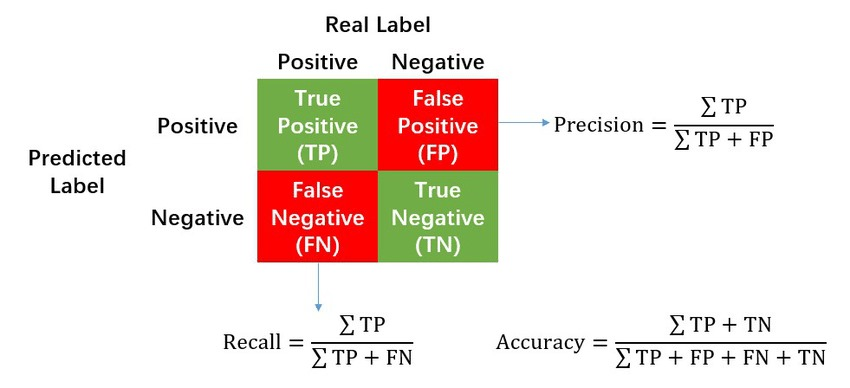

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

confusion matrix visualization

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()